In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
path = 'AAPL.csv'
data = pd.read_csv(path)
data['Month'] = pd.to_datetime(data['Date'])
data = data[['Month', 'Close']]
data.set_index('Month', inplace=True)
data.head(10)

,Close
Month,
2023-07-12,189.770004
2023-07-13,190.539993
2023-07-14,190.690002
2023-07-17,193.990005
2023-07-18,193.729996
2023-07-19,195.100006
2023-07-20,193.130005
2023-07-21,191.940002
2023-07-24,192.750000


In [76]:
len(data)

253

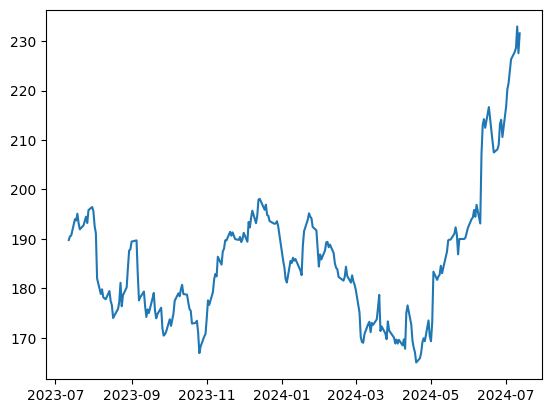

In [77]:
plt.plot(data)

## Augmented Dickey-Fuller test

In [78]:
from statsmodels.tsa.stattools import adfuller

In [79]:
result = adfuller(data['Close'])
print(result)

(0.36680453262438806, 0.980210195436285, 0, 252, {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}, 1137.2267191667218)


In [80]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.366805
p-value: 0.980210
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [81]:
# Since p value is more than 0.05, the null hypothesis will be rejected and hence the time series is non stationary

## Finding the value of the d parameter

### 1st difference

In [82]:
diff_1 = data.copy()
diff_1['Diff_1'] = data['Close'].diff()
diff_1.head(10)

,Close,Diff_1
Month,,
2023-07-12,189.770004,NaN
2023-07-13,190.539993,0.769989
2023-07-14,190.690002,0.150009
2023-07-17,193.990005,3.300003
2023-07-18,193.729996,-0.260009
2023-07-19,195.100006,1.370010
2023-07-20,193.130005,-1.970001
2023-07-21,191.940002,-1.190003
2023-07-24,192.750000,0.809998


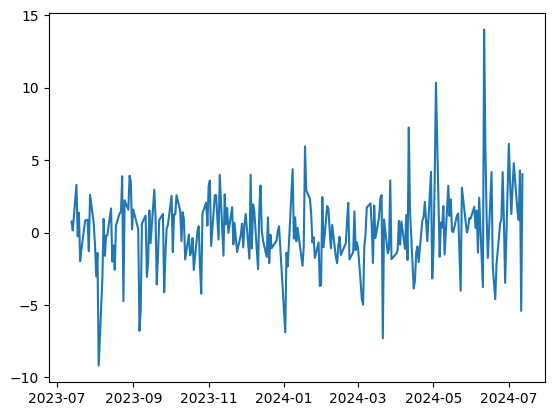

In [83]:
plt.plot(diff_1['Diff_1'])

In [84]:
diff_1.keys()

Index(['Close', 'Diff_1'], dtype='object')

In [85]:
diff_1.replace([np.inf, -np.inf], np.nan, inplace=True)
diff_1.dropna(inplace=True)
diff_1.head()

,Close,Diff_1
Month,,
2023-07-13,190.539993,0.769989
2023-07-14,190.690002,0.150009
2023-07-17,193.990005,3.300003
2023-07-18,193.729996,-0.260009
2023-07-19,195.100006,1.370010


In [86]:
result = adfuller(diff_1['Diff_1'])
print(result)

(-14.463593433804041, 6.783980303902192e-27, 0, 251, {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}, 1119.6599296195789)


In [87]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.463593
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


### 2nd difference

In [88]:
diff_2 = diff_1.copy()
diff_2['Diff_2'] = diff_1['Diff_1'].diff()
diff_2.head(10)

,Close,Diff_1,Diff_2
Month,,,
2023-07-13,190.539993,0.769989,NaN
2023-07-14,190.690002,0.150009,-0.619980
2023-07-17,193.990005,3.300003,3.149994
2023-07-18,193.729996,-0.260009,-3.560012
2023-07-19,195.100006,1.370010,1.630019
2023-07-20,193.130005,-1.970001,-3.340011
2023-07-21,191.940002,-1.190003,0.779998
2023-07-24,192.750000,0.809998,2.000001
2023-07-25,193.619995,0.869995,0.059997


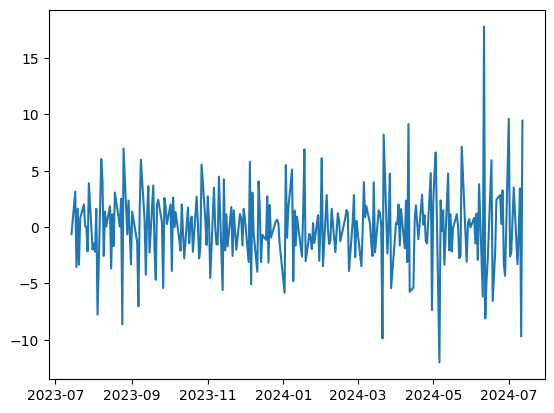

In [89]:
plt.plot(diff_2['Diff_2'])

In [90]:
diff_2.replace([np.inf, -np.inf], np.nan, inplace=True)
diff_2.dropna(inplace=True)
diff_2.head()

,Close,Diff_1,Diff_2
Month,,,
2023-07-14,190.690002,0.150009,-0.619980
2023-07-17,193.990005,3.300003,3.149994
2023-07-18,193.729996,-0.260009,-3.560012
2023-07-19,195.100006,1.370010,1.630019
2023-07-20,193.130005,-1.970001,-3.340011


In [91]:
result = adfuller(diff_2['Diff_2'])
print(result)

(-7.152952666955443, 3.10685102230602e-10, 14, 236, {'1%': -3.4583663275730476, '5%': -2.8738660999177132, '10%': -2.5733390785693766}, 1148.3929478538876)


In [92]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.152953
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


In [93]:
# d value could be taken as 1 or 2 but 2 has alot of noise so we will go with 1

### Finding the value of p

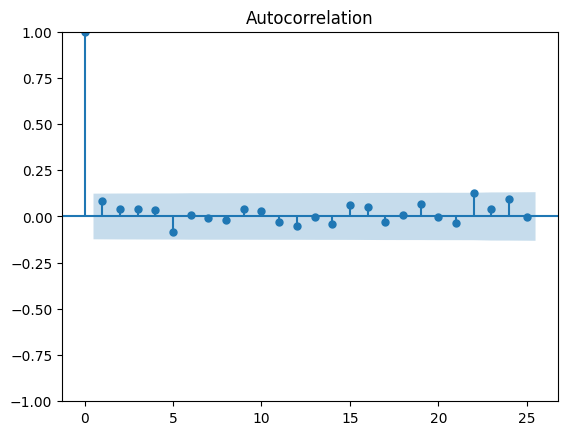

In [94]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Close'].diff().dropna())
plt.show()

In [95]:
# p-value = 1 since the first lag is significantly out of the limit

## Finding the value of q

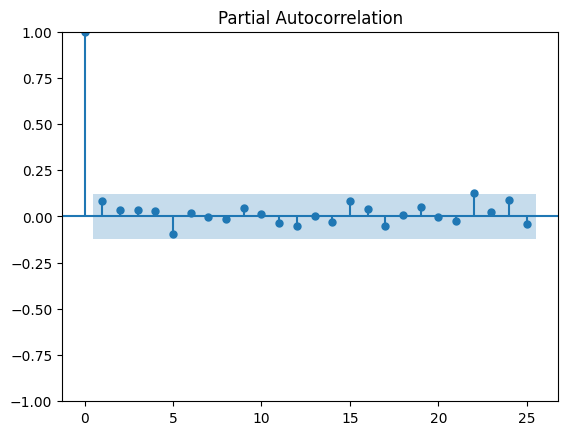

In [96]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Close'].diff().dropna())
plt.show()

In [97]:
# q-value = 2 since 2 of the lags are out of the significance limit

## Building ARIMA model

In [103]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Close'], order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  253
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -600.446
Date:                Fri, 12 Jul 2024   AIC                           1202.892
Time:                        20:56:51   BIC                           1206.422
Sample:                             0   HQIC                          1204.312
                                - 253                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.8728      0.353     19.489      0.000       6.182       7.564
Ljung-Box (L1) (Q):                   1.71   Jarque-Bera (JB):               172.65
Prob(Q):                              0.19   Pr

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


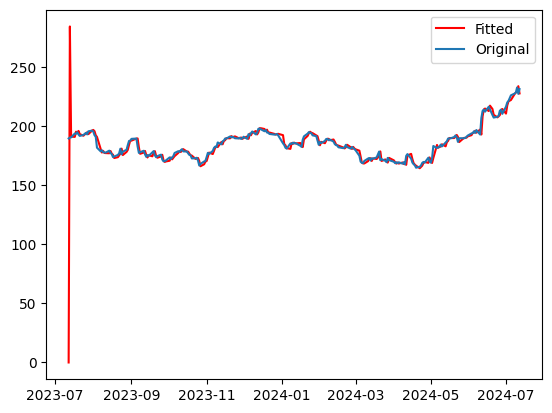

In [99]:
from statsmodels.graphics.tsaplots import plot_predict
pred = model_fit.predict(start=0, end=len(data)-1, dynamic=False)
plt.plot(pred, color='red', label='Fitted')
plt.plot(data['Close'], label='Original')
plt.legend()

### Predicting future values

253    231.600006
254    231.600006
255    231.600006
256    231.600006
257    231.600006
          ...    
348    231.600006
349    231.600006
350    231.600006
351    231.600006
352    231.600006
Name: predicted_mean, Length: 100, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


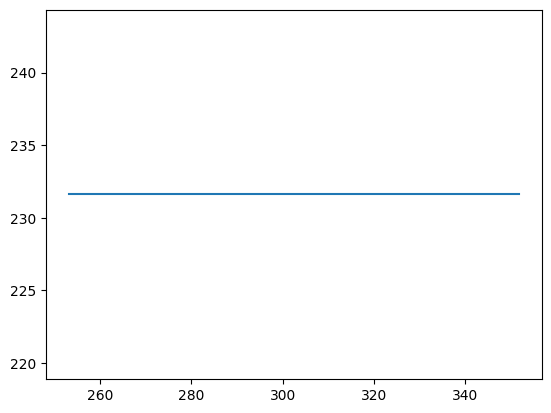

In [104]:
forecast_steps = 100
forecast_pred = model_fit.forecast(steps=forecast_steps)
print(forecast_pred)
plt.plot(forecast_pred)

In [105]:
last_date = data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]
forecast_dates

DatetimeIndex(['2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30',
               '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31',
               '2025-08-31', '2025-09-30', '2025-10-31', '2025-11-30',
               '2025-12-31', '2026-01-31', '2026-02-28', '2026-03-31',
               '2026-04-30', '2026-05-31', '2026-06-30', '2026-07-31',
               '2026-08-31', '2026-09-30', '2026-10-31', '2026-11-30',
               '2026-12-31', '2027-01-31', '2027-02-28', '2027-03-31',
               '2027-04-30', '2027-05-31', '2027-06-30', '2027-07-31',
               '2027-08-31', '2027-09-30', '2027-10-31', '2027-11-30',
               '2027-12-31', '2028-01-31', '2028-02-29', '2028-03-31',
               '2028-04-30', '2028-05-31', '2028-06-30', '2028-07-31',
               '2028-08-31', '2028-09-30', '2028-10-31', '2028-11-30',
               '2028-12-31', '2029-01-31', '2029-02-28', '2029-03-31',
      

In [106]:
forecast_df = pd.DataFrame(forecast_pred.to_numpy(), index=forecast_dates, columns=['Forecast'])
forecast_df

,Forecast
2024-08-31,231.600006
2024-09-30,231.600006
2024-10-31,231.600006
2024-11-30,231.600006
2024-12-31,231.600006
...,...
2032-07-31,231.600006
2032-08-31,231.600006
2032-09-30,231.600006
2032-10-31,231.600006


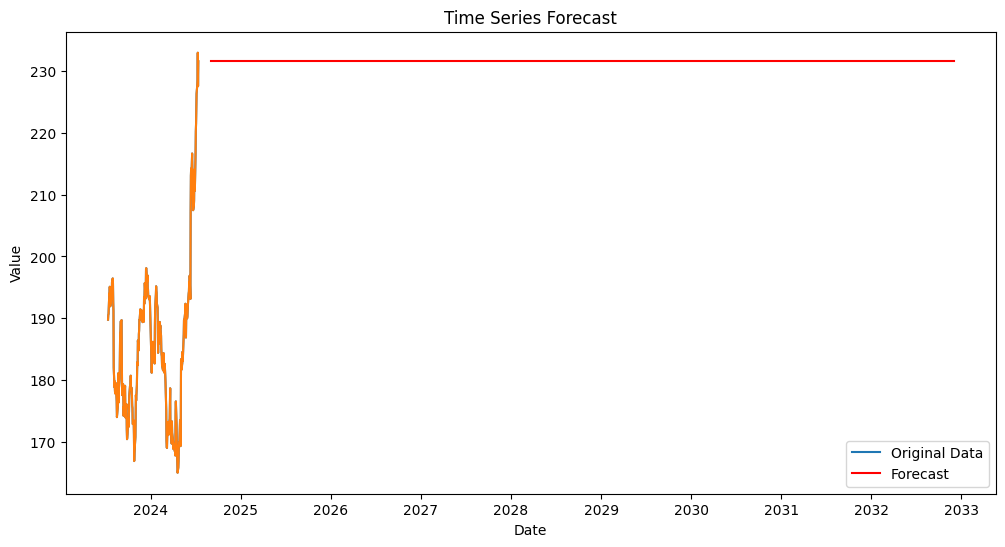

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Original Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], color='red', label='Forecast')
plt.plot(data)
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()